In [0]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import codecs
import datetime
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from google.colab import files
url = 'https://github.com/bosinupebi/Data-Science/blob/master/Bus3.xlsx?raw=true'


In [0]:
data=pd.read_excel(url)

In [0]:
data=data.dropna()

In [0]:
data=data.set_index('Report Date')

In [108]:
data.head()

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,schedule,Direction,Vehicle
Report Date,,,,,,,,,,
2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,10,W/B,1291.0
2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,0,S/B,8123.0
2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,30,S/B,8306.0
2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,22,S/B,7777.0
2018-01-01,84,01:10:00,Monday,SWST,Mechanical,10.0,20.0,10,W/B,8453.0


In [38]:
data.isna().sum()

Route        0
Time         0
Day          0
Location     0
Incident     0
Min Delay    0
Min Gap      0
schedule     0
Direction    0
Vehicle      0
dtype: int64

In [0]:
df = data.copy()

In [0]:
df['Day'] = df['Day'].map({'Monday': 1, 'Tuesday': 2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}) #label creation - Day

In [0]:
df['Incident'] = df['Incident'].map({'Mechanical': 1, 'Investigation': 2,'Utilized Off Route':3,'Late Leaving Garage':4,'Diversion':5,'Emergency Services':6,'General Delay':7}) #label creation - incident

In [0]:
#label creation direction
labels = df['Direction'].astype('category').cat.categories.tolist()
replace_map_comp = {'Direction' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
df2 = df.copy()
df2.replace(replace_map_comp, inplace=True)

In [0]:
#label creation location
labels1 = df2['Location'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'Location' : {k: v for k,v in zip(labels1,list(range(1,len(labels1)+1)))}}
df3 = df2.copy()
df3.replace(replace_map_comp1, inplace=True)

In [43]:
df3.head()

,Route,Time,Day,Location,Incident,Min Delay,Min Gap,schedule,Direction,Vehicle
Report Date,,,,,,,,,,
2018-01-01,165,00:17:00,1,9401,1,10.0,20.0,10,75,1291.0
2018-01-01,706,00:20:00,1,872,3,1.0,1.0,0,66,8123.0
2018-01-01,28,00:30:00,1,1785,2,30.0,60.0,30,66,8306.0
2018-01-01,12,00:55:00,1,4440,1,22.0,44.0,22,66,7777.0
2018-01-01,84,01:10:00,1,7483,1,10.0,20.0,10,75,8453.0


In [0]:
X = np.array(df3[['Min Delay','Day','Route','Location']])#prepare the independent variables for knn
y=np.array(df3['Incident'])#prepare the dependent variables for knn

In [45]:
k = range(1,40,5)
avg_nz=[] #average non zero predictions
avg_z=[] #average false predictions
avg_score= [] #average accuracy score
#2 loops to iterate through each random train/test split and each neareat neighbour value
for i in k:
    split=np.random.uniform(low=0.1, high=0.3, size=(6))#train/test splits criteria
    score=[] 
    nz=[] 
    z=[]
    print('k =',i)
    for j in split:
        knn1 = KNeighborsClassifier(n_neighbors=i) 
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=j) 
        knn1.fit(X_train,y_train)
        y_pred=knn1.predict(X_test) 
        nz.append(np.count_nonzero(y_test==y_pred)) 
        z.append(np.count_nonzero(y_test!=y_pred))
        score.append(accuracy_score(y_test,y_pred)) 
    avg_score.append(np.mean(score))
    avg_z.append(np.mean(z))
    avg_nz.append(np.mean(nz)) 
    print("Average correct predictions: ", np.mean(nz))
    print('Average false predictions:',np.mean(z))
    print("Average accuracy score:", round(np.mean(score),4))
    print("")

k = 1
Average correct predictions:  2572.3333333333335
Average false predictions: 3227.8333333333335
Average accuracy score: 0.4442

k = 6
Average correct predictions:  3012.1666666666665
Average false predictions: 3453.0
Average accuracy score: 0.4659

k = 11
Average correct predictions:  2871.3333333333335
Average false predictions: 3253.5
Average accuracy score: 0.4681

k = 16
Average correct predictions:  2817.6666666666665
Average false predictions: 3230.8333333333335
Average accuracy score: 0.4662

k = 21
Average correct predictions:  2445.3333333333335
Average false predictions: 2814.0
Average accuracy score: 0.4651

k = 26
Average correct predictions:  2392.8333333333335
Average false predictions: 2763.1666666666665
Average accuracy score: 0.4671

k = 31
Average correct predictions:  3255.6666666666665
Average false predictions: 3932.1666666666665
Average accuracy score: 0.4541

k = 36
Average correct predictions:  2720.3333333333335
Average false predictions: 3306.166666666666

In [0]:
#Descriptive stats

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


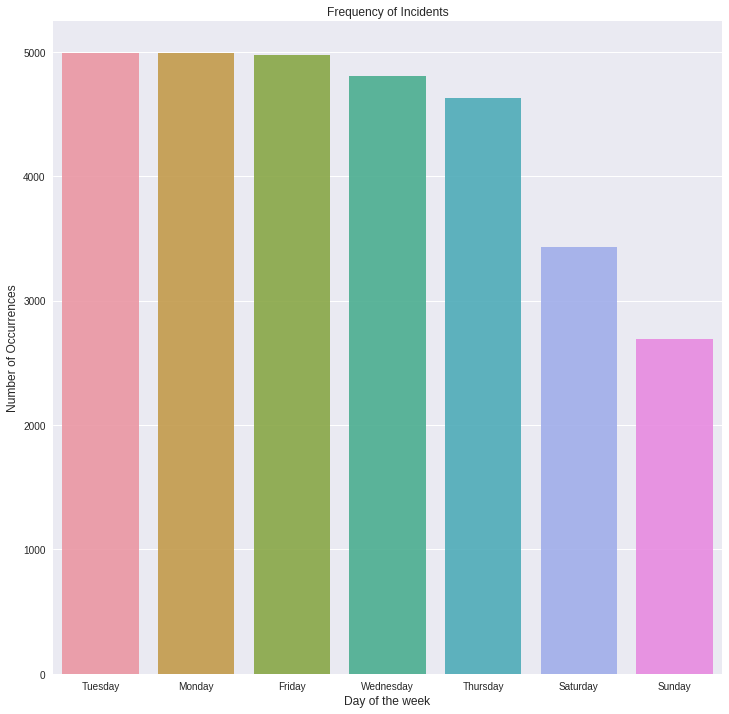

In [124]:
plt.figure(figsize=(12,12))
Day = data['Day'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Day.index, Day.values, alpha=0.9)
plt.title('Frequency of Incidents')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


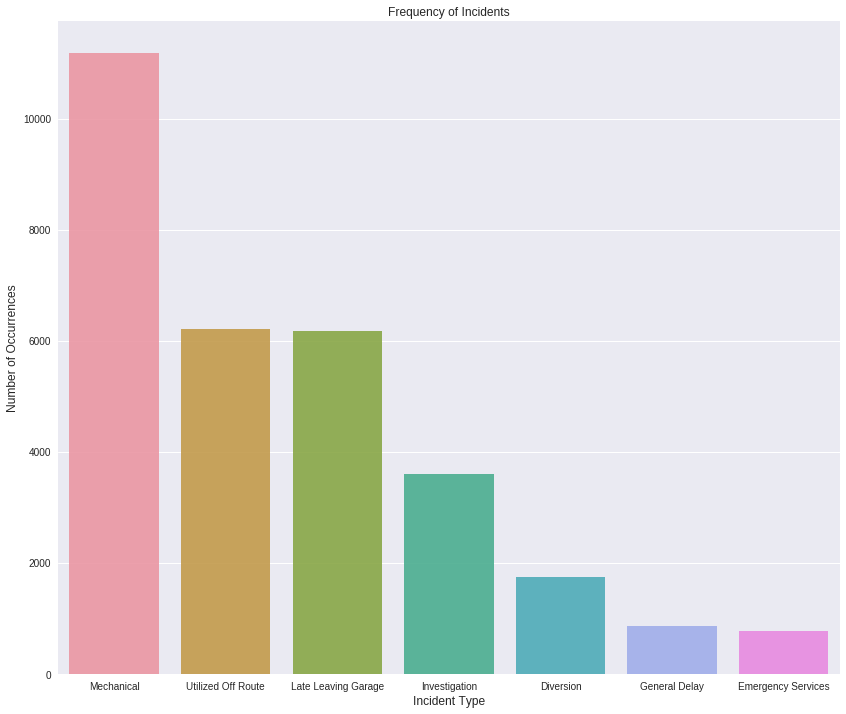

In [125]:
plt.figure(figsize=(14,12))
Incident = data['Incident'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Incident.index, Incident.values, alpha=0.9)
plt.title('Frequency of Incidents')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Incident Type', fontsize=12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


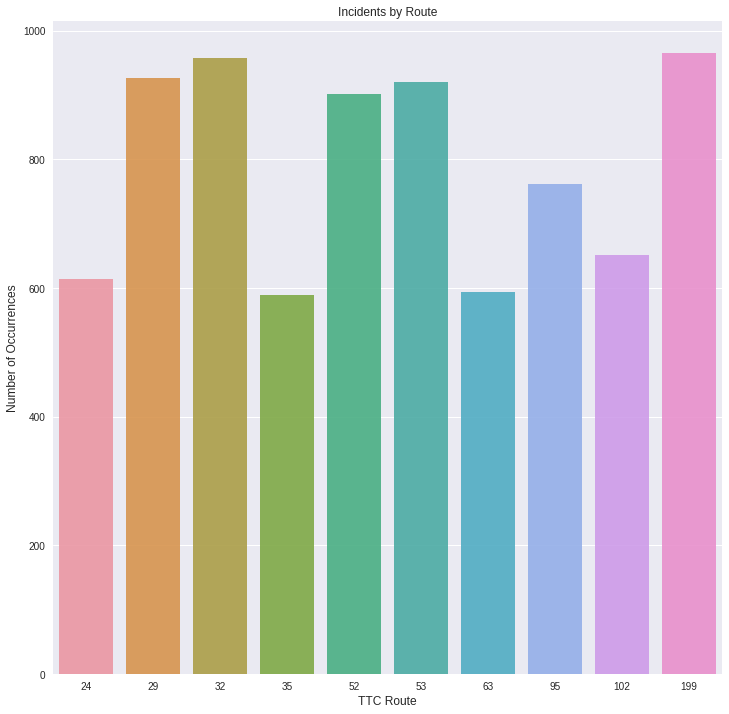

In [122]:
plt.figure(figsize=(12,12))
R = df3['Route'].value_counts()
route = R.head(10)
sns.set(style="darkgrid")
sns.barplot(route.index, route.values, alpha=0.9)
plt.title('Incidents by Route')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('TTC Route', fontsize=12)
plt.show()

In [0]:
g = df3.groupby(pd.Grouper(freq="W"))
gsum = g.sum()
gcount = g.count()
gmean = g.mean()

(Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Delay(Min)'),
 Text(0.5, 1.0, 'Total Weekly Delays'))

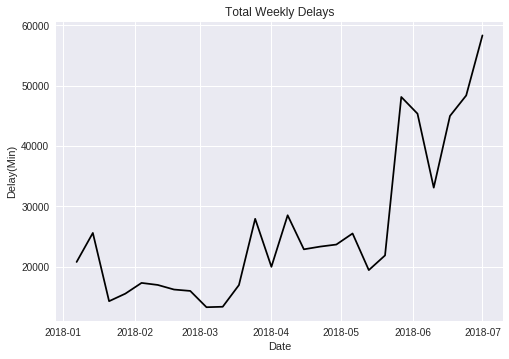

In [51]:
plt.plot(gsum['Min Delay'],color = 'black')
plt.xlabel('Date'), plt.ylabel('Delay(Min)'), plt.title('Total Weekly Delays')

(Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Incident(count)'),
 Text(0.5, 1.0, 'Count of Weekly Incidents'))

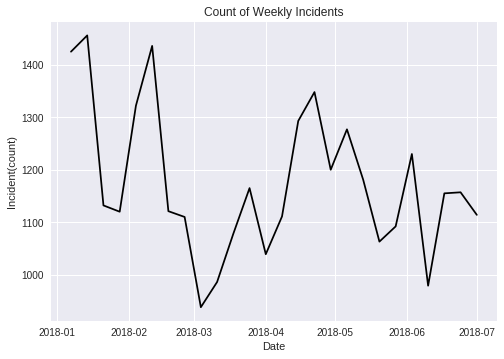

In [52]:
plt.plot(gcount['Incident'],color = 'black')
plt.xlabel('Date'), plt.ylabel('Incident(count)'), plt.title('Count of Weekly Incidents')

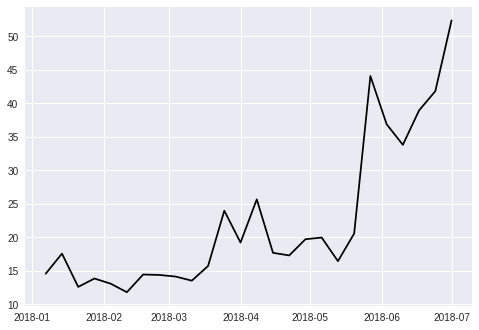

In [53]:
plt.plot(gmean['Min Delay'], color = 'black')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 0, 'Location')

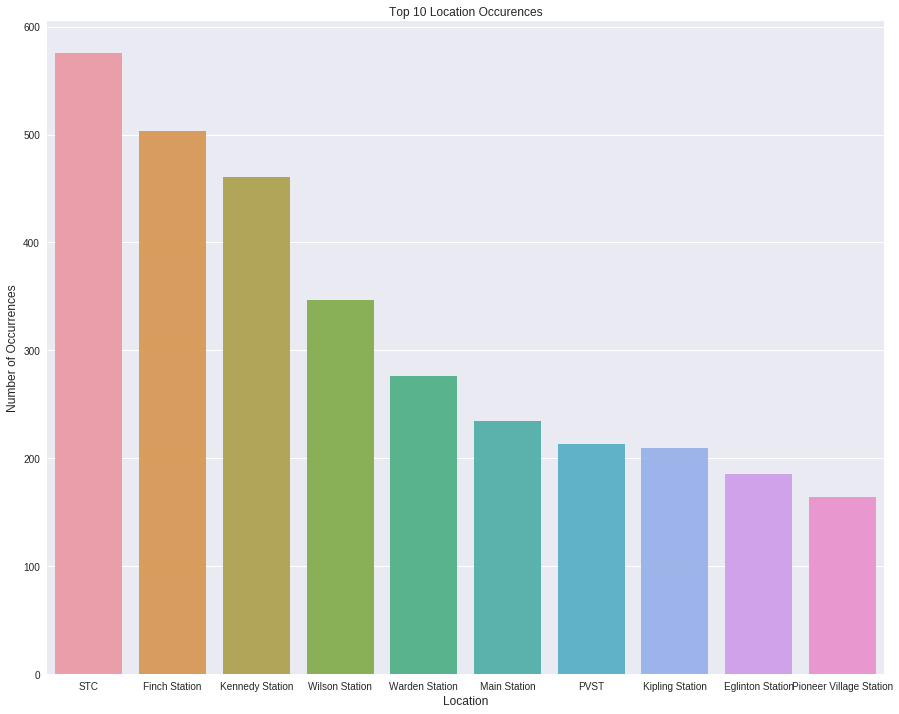

In [123]:
plt.figure(figsize=(15,12))
l = df['Location'].value_counts()
location = l.head(10)
sns.set(style="darkgrid")
sns.barplot(location.index, location.values, alpha=0.9)
plt.title('Top 10 Location Occurences')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Location', fontsize=12)


In [0]:
hsum = df3.groupby('Incident').sum()
hmean = df3.groupby('Incident').mean()

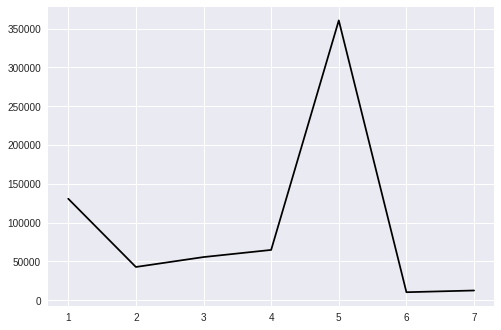

In [69]:
plt.plot(hsum['Min Delay'], color = 'black')

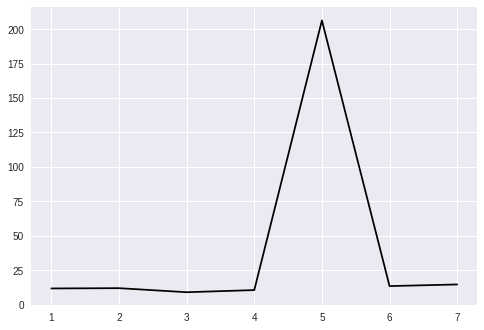

In [70]:
plt.plot(hmean['Min Delay'], color = 'black')